Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

18. Missing Attribute Values: None


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('bank-full.csv',delimiter=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Exploratory Data Analysis (EDA) and Visulization of dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#removing NA value in dataset
data=data.dropna()
data.shape

(45211, 17)

In [5]:
data.duplicated().sum()

0

In [6]:
#visulization of categorical data
data1=data[data.y=='yes']
data2=data[data.y=='no']
data1.shape,data2.shape

((5289, 17), (39922, 17))

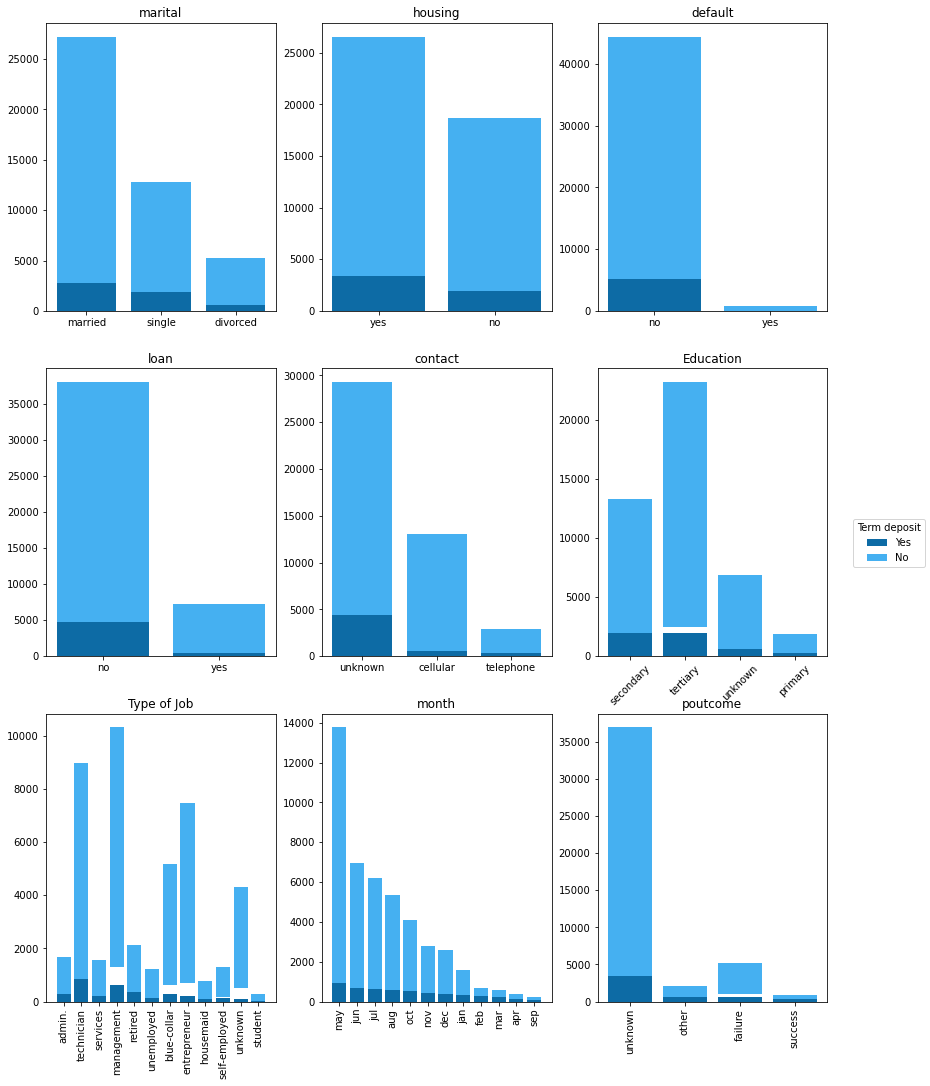

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(14,18))
b1=ax[0, 0].bar(data1['marital'].unique(),height = data1['marital'].value_counts(),color='#0d6ba5')
b2=ax[0, 0].bar(data2['marital'].unique(),height = data2['marital'].value_counts()[data2['marital'].value_counts().index],
                bottom = data1['marital'].value_counts(),color = '#45b0f1') 
ax[0, 0].title.set_text('marital')

ax[0, 1].bar(data1['housing'].unique(),height = data1['housing'].value_counts(),color='#0d6ba5')
ax[0, 1].bar(data2['housing'].unique(),height = data2['housing'].value_counts()[data2['housing'].value_counts().index],
             bottom = data1['housing'].value_counts(),color = '#45b0f1') 
ax[0, 1].title.set_text('housing')

ax[0, 2].bar(data1['default'].unique(),height = data1['default'].value_counts(),color='#0d6ba5')
ax[0, 2].bar(data2['default'].unique(),height = data2['default'].value_counts()[data2['default'].value_counts().index],
             bottom = data1['default'].value_counts(),color = '#45b0f1') 
ax[0, 2].title.set_text('default')

ax[1, 0].bar(data1['loan'].unique(),height = data1['loan'].value_counts(),color='#0d6ba5')
ax[1, 0].bar(data2['loan'].unique(),height = data2['loan'].value_counts()[data2['loan'].value_counts().index],
             bottom = data1['loan'].value_counts(),color = '#45b0f1') 
ax[1, 0].title.set_text('loan')


ax[1, 1].bar(data1['contact'].unique(),height = data1['contact'].value_counts(),color='#0d6ba5')
ax[1, 1].bar(data2['contact'].unique(),height = data2['contact'].value_counts()[data2['contact'].value_counts().index],
             bottom = data1['contact'].value_counts(),color = '#45b0f1') 
ax[1, 1].title.set_text('contact')

ax[1, 2].bar(data1['education'].unique(),height = data1['education'].value_counts(),color='#0d6ba5')
ax[1, 2].bar(data2['education'].unique(),height=data2['education'].value_counts()[data2['education'].value_counts().index],
             bottom = data1['education'].value_counts(),color = '#45b0f1') 
ax[1, 2].title.set_text('Education')
ax[1, 2].tick_params(axis='x',rotation=45)

ax[2, 0].bar(data1['job'].unique(),height = data1['job'].value_counts(),color='#0d6ba5')
ax[2, 0].bar(data2['job'].unique(),height = data2['job'].value_counts()[data2['job'].value_counts().index],
             bottom = data1['job'].value_counts(),color = '#45b0f1') 
ax[2, 0].title.set_text('Type of Job')
ax[2, 0].tick_params(axis='x',rotation=90)

ax[2, 1].bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#0d6ba5')
ax[2, 1].bar(data2['month'].unique(),height = data2['month'].value_counts()[data2['month'].value_counts().index],
             bottom = data1['month'].value_counts(),color = '#45b0f1') 
ax[2, 1].title.set_text('month')
ax[2, 1].tick_params(axis='x',rotation=90)
ax[2, 2].bar(data1['poutcome'].unique(),height = data1['poutcome'].value_counts(),color='#0d6ba5')
ax[2, 2].bar(data2['poutcome'].unique(),height = data2['poutcome'].value_counts()[data2['poutcome'].value_counts().index],
             bottom = data1['poutcome'].value_counts(),color = '#45b0f1') 
ax[2, 2].title.set_text('poutcome')
ax[2, 2].tick_params(axis='x',rotation=90)
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

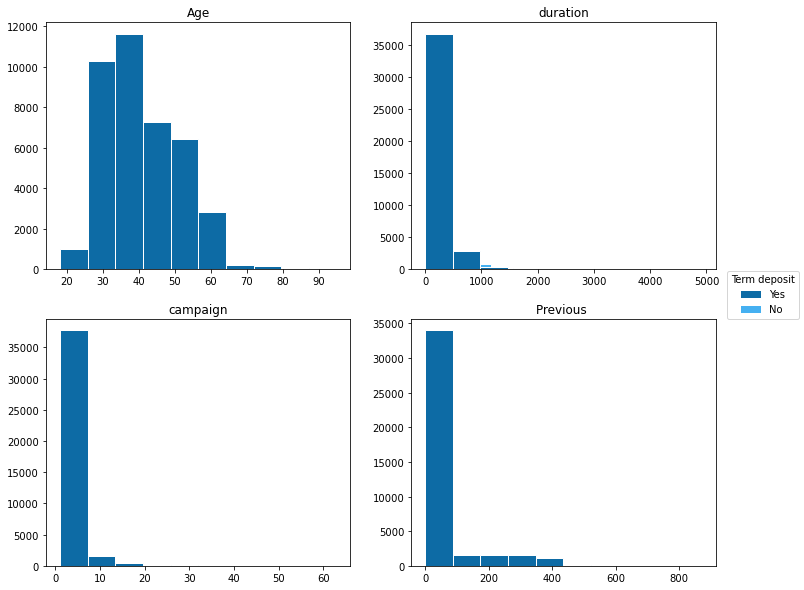

In [8]:
# histogram plot for continous variables
fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].hist(data1['age'],color = '#45b0f1', edgecolor='white') 
ax[0, 0].hist(data2['age'],color='#0d6ba5', edgecolor='white')
ax[0, 0].title.set_text('Age')
ax[0, 1].hist(data1['duration'],color = '#45b0f1',edgecolor='white') 
ax[0, 1].hist(data2['duration'],color='#0d6ba5',edgecolor='white')
ax[0, 1].title.set_text('duration')
ax[1, 0].hist(data1['campaign'],color = '#45b0f1', edgecolor='white') 
ax[1, 0].hist(data2['campaign'],color='#0d6ba5', edgecolor='white')
ax[1, 0].title.set_text('campaign')
ax[1, 1].hist(data1[data1['pdays'] != 999]['pdays'],color = '#45b0f1', edgecolor='white') 
ax[1, 1].hist(data2[data2['pdays'] != 999]['pdays'],color='#0d6ba5', edgecolor='white')
ax[1, 1].title.set_text('Previous ')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

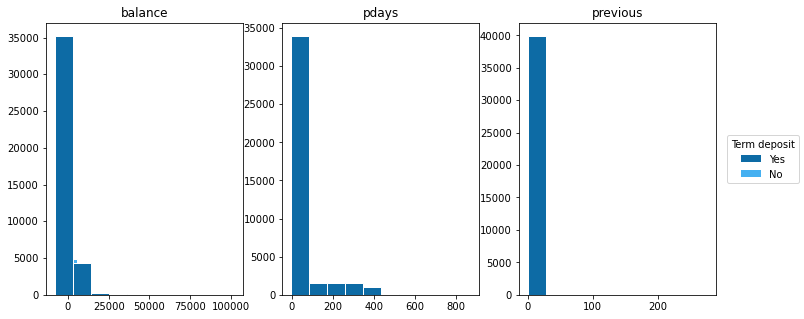

In [9]:
fig, ax = plt.subplots(1, 3,squeeze=False, figsize=(12,5))

ax[0, 0].hist(data1['balance'],color = '#45b0f1', edgecolor='white') 
ax[0, 0].hist(data2['balance'],color='#0d6ba5', edgecolor='white')
ax[0, 0].title.set_text('balance')
ax[0, 1].hist(data1['pdays'],color = '#45b0f1',edgecolor='white') 
ax[0, 1].hist(data2['pdays'],color='#0d6ba5', edgecolor='white')
ax[0, 1].title.set_text('pdays')
ax[0, 2].hist(data1['previous'],color = '#45b0f1', edgecolor='white') 
ax[0, 2].hist(data2['previous'],color='#0d6ba5',edgecolor='white')
ax[0, 2].title.set_text('previous')

plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

## One-Hot Encoding for categorical variables

In [10]:
new_data=data.copy()
new_data=pd.get_dummies(data,columns=['job','marital','education','contact','poutcome','month'],drop_first=False)
new_data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
# Custom Binary Encoding of Binary o/p variables 
new_data['default'] = np.where(new_data['default'].str.contains("yes"), 1, 0)
new_data['housing'] = np.where(new_data['housing'].str.contains("yes"), 1, 0)
new_data['loan'] = np.where(new_data['loan'].str.contains("yes"), 1, 0)
new_data['y'] = np.where(new_data['y'].str.contains("yes"), 1, 0)
new_data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


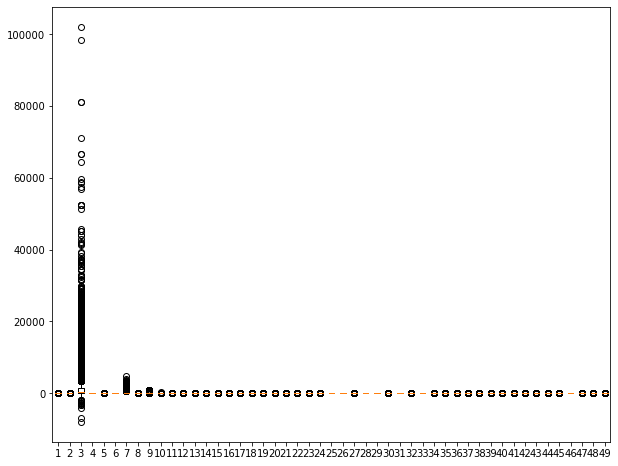

In [12]:
# checking from outliers
plt.figure(figsize=(10,8))
plt.boxplot(new_data)
plt.show()

C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

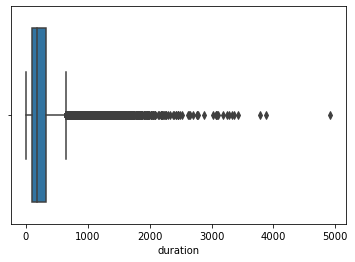

In [13]:
sns.boxplot(new_data['duration'])

C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

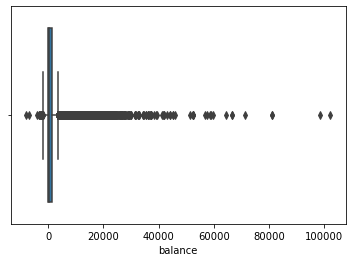

In [14]:
sns.boxplot(new_data['balance'])

#### As we show that duration and balance  have some outliers

In [16]:
def outlierDetect(col):
    Q1 = np.percentile(col, 25, interpolation = 'midpoint')  
    Q3 = np.percentile(col, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    return low_lim,up_lim

In [17]:
for i in range(12):
    lower,uper=outlierDetect(new_data['balance'])
    new_data=new_data[(new_data['balance']<uper )&(new_data['balance']>lower)]
    lower,uper=outlierDetect(new_data['duration'])
    new_data=new_data[(new_data['duration']<uper )&(new_data['duration']>lower)]
    print(new_data.shape)

(37570, 49)
(34039, 49)
(32227, 49)
(31266, 49)
(30750, 49)
(30441, 49)
(30301, 49)
(30189, 49)
(30114, 49)
(30075, 49)
(30054, 49)
(30033, 49)


In [18]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30033 entries, 1 to 45205
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  30033 non-null  int64
 1   default              30033 non-null  int32
 2   balance              30033 non-null  int64
 3   housing              30033 non-null  int32
 4   loan                 30033 non-null  int32
 5   day                  30033 non-null  int64
 6   duration             30033 non-null  int64
 7   campaign             30033 non-null  int64
 8   pdays                30033 non-null  int64
 9   previous             30033 non-null  int64
 10  y                    30033 non-null  int32
 11  job_admin.           30033 non-null  uint8
 12  job_blue-collar      30033 non-null  uint8
 13  job_entrepreneur     30033 non-null  uint8
 14  job_housemaid        30033 non-null  uint8
 15  job_management       30033 non-null  uint8
 16  job_retired          3

In [19]:
# Dividing our data into input and output variables 
X = new_data.drop(['y'],1)
y = new_data['y']

C:\Users\hmaca\AppData\Local\Temp/ipykernel_8852/3991998035.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = new_data.drop(['y'],1)


In [20]:
y.value_counts()

0    28156
1     1877
Name: y, dtype: int64

In [21]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [22]:
#Logistic regression and fit the model
clf=LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\hmaca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Training Accuracy

In [23]:
#Predict for X dataset
y_pred_train=clf.predict(X_train)
y_pred_train_df = pd.DataFrame({'actual': y_train,'predicted_prob': y_pred_train})
y_pred_train_df

,actual,predicted_prob
25160,0,0
18941,0,0
1769,0,0
21262,0,0
3493,0,0
...,...,...
18857,0,0
29043,0,0
14177,0,0
15505,0,0


## Testing Accuracy

In [24]:
y_pred_test=clf.predict(X_test)
y_pred_test_df = pd.DataFrame({'actual': y_test,'predicted_prob': y_pred_test})
y_pred_test_df

,actual,predicted_prob
44002,0,0
37519,0,0
8005,0,0
44863,1,1
5675,0,0
...,...,...
6242,0,0
26095,0,0
17151,0,0
20423,0,0


## Checking for overfitting and underfitting

In [25]:
print(f'Training-set accuracy score: {round(accuracy_score(y_train, y_pred_train),5)}')
print(f'Testing-set accuracy score: {round(accuracy_score(y_test, y_pred_test),5)}')

Training-set accuracy score: 0.94364
Testing-set accuracy score: 0.94269


#### Both have quite same accuracy so their is no overfitting and underfitting

## Confusion Matrix

In [26]:
cm=confusion_matrix(y_test,y_pred_test)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[9199   75]
 [ 493  144]]


<AxesSubplot:>

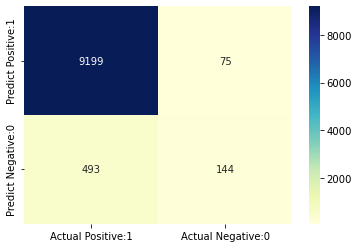

In [27]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


## Classification report

In [28]:
# print classification accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f'Classification accuracy : {round(classification_accuracy,4)}')


Classification accuracy : 0.9427


In [29]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(f'Classification error : {round(classification_error,4)}')


Classification error : 0.0573


## Precision

In [30]:
# print precision score

precision = TP / float(TP + FP)


print(f'Precision : {round(precision,4)}')

Precision : 0.9919


## Recall or True Positive Rate

In [31]:
recall = TP / float(TP + FN)

print(f'Recall or Sensitivity : {round(recall,4)}')

Recall or Sensitivity : 0.9491


## Adjusting the threshold level

In [32]:
# print the predicted probabilities of two classes- 0 and 1

y_pred_prob = clf.predict_proba(X_test)
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of client Not subscribed a term deposit(0)',
                                                         'Prob of client subscribed a term deposit (1)'])
y_pred_prob_df

,Prob of client Not subscribed a term deposit(0),Prob of client subscribed a term deposit (1)
0,0.845635,0.154365
1,0.981928,0.018072
2,0.999159,0.000841
3,0.094899,0.905101
4,0.999732,0.000268
...,...,...
9906,0.998496,0.001504
9907,0.968950,0.031050
9908,0.996997,0.003003
9909,0.962655,0.037345


In [33]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9274
           1       0.66      0.23      0.34       637

    accuracy                           0.94      9911
   macro avg       0.80      0.61      0.65      9911
weighted avg       0.93      0.94      0.93      9911



### Try different threshold 


In [34]:
pred_threshold = pd.DataFrame( columns = ['Threshold',
                               'Correct_Predictions',
                               'FP',
                               'FN',
                               'Precision',
                               'Recall'],index=None) 
pred_threshold

,Threshold,Correct_Predictions,FP,FN,Precision,Recall


In [35]:

from sklearn.preprocessing import binarize

for i in range(1,10):
    
    cm1=0
    
    y_pred1 = clf.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    cm1 = confusion_matrix(y_test, y_pred2)

    TP = cm1[0,0]
    TN = cm1[1,1]
    FP = cm1[0,1]
    FN = cm1[1,0]
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
   
    pred_threshold = pred_threshold.append({'Threshold':i,
                               'Correct_Predictions':TP+FP,
                               'FP':FP,
                               'FN':FN,
                               'Precision':TP/(TP+FP),
                               'Recall':TP/(TP+FN)}, ignore_index=True)

C:\Users\hmaca\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\hmaca\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\hmaca\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\hmaca\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.4 as keyword args. From

In [36]:
pred_threshold

,Threshold,Correct_Predictions,FP,FN,Precision,Recall
0,1.0,9274.0,1241.0,169.0,0.866185,0.979395
1,2.0,9274.0,501.0,291.0,0.945978,0.967895
2,3.0,9274.0,254.0,381.0,0.972612,0.959472
3,4.0,9274.0,131.0,450.0,0.985874,0.953091
4,5.0,9274.0,75.0,493.0,0.991913,0.949133
5,6.0,9274.0,35.0,544.0,0.996226,0.944393
6,7.0,9274.0,17.0,582.0,0.998167,0.940848
7,8.0,9274.0,8.0,610.0,0.999137,0.938234
8,9.0,9274.0,3.0,632.0,0.999677,0.936181


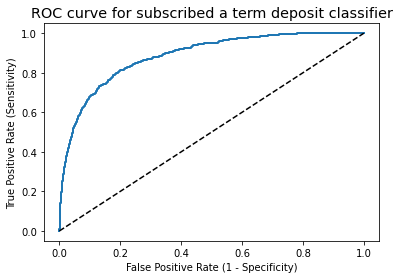

In [37]:
# ROC Curve plotting and finding AUC value
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve( y_test, y_pred1)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for subscribed a term deposit classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred1)
auc

0.8854930768113553

### Conclusions
The logistic regression model accuracy score is 0.8854. So, the model does a very good job in predicting Whether the client has subscribed a term deposit or not 

The model shows no signs of overfitting.

ROC AUC of our model is reasonably high. So, we can conclude that our classifier does a good job in predicting Whether the client has subscribed a term deposit or not 